#### Post-pruning in decision trees is a technique used to simplify the model by reducing its complexity after the tree has been fully grown. Decision trees often overfit data because they can split until every leaf (end node) is as pure as possible, capturing noise rather than general patterns. Pruning addresses this by removing branches or nodes that add minimal predictive power, improving the model's performance on unseen data.


## Steps of Post-Pruning

### Grow the Full Tree: 
 - First, the decision tree is grown to its maximum depth, meaning splits are made until each node is pure or contains only a small number of samples. This full-grown tree will often overfit because it captures every detail in the training data, even noise.

### Evaluate Nodes for Pruning:
 - After the tree is fully grown, each node is evaluated to see if removing it would improve or minimally impact the model’s accuracy on a validation set.
 - Nodes are pruned if they add little value, such as nodes that only separate a few samples or nodes where children aren’t significantly different from the parent.

### Prune the Tree: 
 - Nodes are pruned starting from the bottom (leaves) up toward the root, removing branches that don’t contribute meaningfully to the model’s accuracy.
 - Pruning Criterion: A typical criterion is a cost-complexity measure, where the tree’s complexity is reduced by removing nodes that lead to a minimal loss in predictive power on the validation set.

### Select the Optimal Tree: 
 - This process continues until the tree reaches an optimal size where it balances accuracy and simplicity. The final pruned tree is then used as the model for making predictions.

## Why Post-Pruning is Effective
 - Pruning reduces the model's tendency to overfit by creating a simpler, more generalized structure. It improves the model's accuracy on unseen data by reducing the risk of capturing noise specific to the training set.

### Example
 - Imagine a decision tree classifying animals based on features like "has fur," "can fly," "lays eggs," etc. In a fully grown tree:

The model might make specific splits that distinguish very similar animals (like two types of birds) based on minor features, making the tree complex and specific to the training data.

- After pruning: The model would simplify, possibly grouping similar animals like certain bird species together if they have the same key features. This simplification helps the model generalize better and reduces overfitting by focusing on essential features.

### Types of Pruning Methods
- Cost-Complexity Pruning (CCP): Balances the trade-off between the tree's accuracy and its complexity.
- Reduced Error Pruning: Prunes nodes that lead to higher errors on a validation set.

### Advantages of Post-Pruning
 - Reduces Overfitting: Pruned trees focus on general patterns rather than noise.
 - Improves Interpretability: Pruned trees are simpler and easier to understand.
 - Boosts Prediction Accuracy on New Data: By avoiding overfitting, pruned trees are more likely to perform well on unseen data.


* In summary, post-pruning optimizes decision trees by cutting unnecessary branches, leading to models that are simpler, more accurate, and less prone to overfitting.

In [36]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')


In [37]:
# Create a more complex synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_clusters_per_class=3, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
# Step 1: Train a fully grown decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Evaluate the fully grown tree
print("Accuracy of fully grown tree:", tree.score(X_test, y_test))


Accuracy of fully grown tree: 0.69


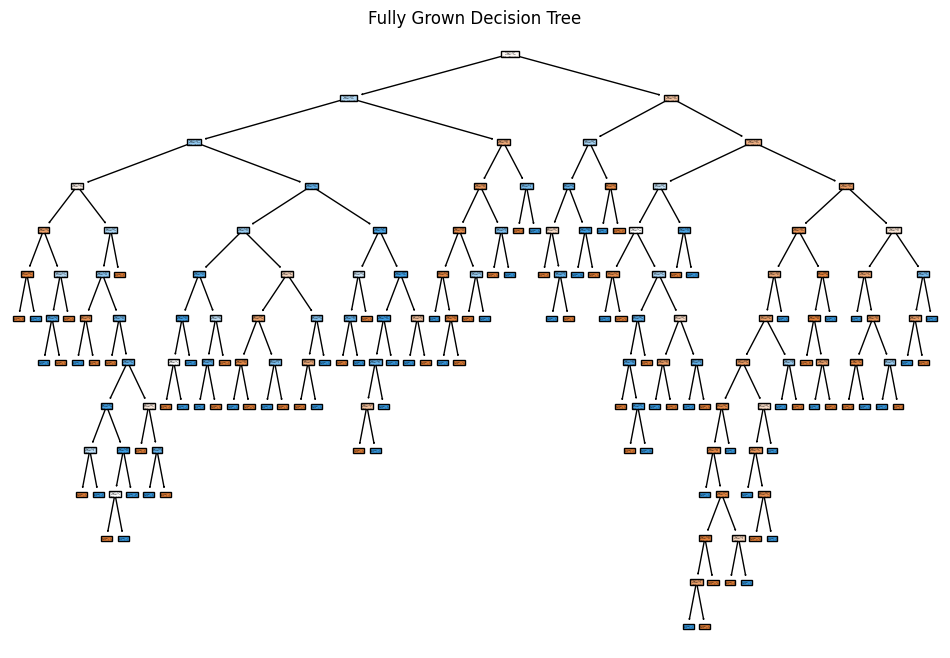

In [42]:
# Visualizing the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True)
plt.title("Fully Grown Decision Tree")
plt.show()

In [43]:
# Step 2: Apply cost-complexity pruning
# Get the path of ccp_alphas and impurities to prune the tree

path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [44]:
path

{'ccp_alphas': array([0.        , 0.00138249, 0.00139286, 0.0014011 , 0.00141176,
        0.00186741, 0.00190476, 0.00190476, 0.00190476, 0.00214286,
        0.00214286, 0.00214286, 0.00228571, 0.00238095, 0.00238095,
        0.00238095, 0.00240602, 0.00241758, 0.00244898, 0.0025    ,
        0.00253968, 0.00256822, 0.00260714, 0.00261905, 0.00261905,
        0.00265306, 0.00266667, 0.00270677, 0.00271062, 0.00275787,
        0.00276786, 0.00277056, 0.00279107, 0.00301413, 0.00348619,
        0.0036648 , 0.00380952, 0.00390693, 0.00409091, 0.00421303,
        0.00428571, 0.00447353, 0.00467532, 0.00467532, 0.00470843,
        0.00474741, 0.00531511, 0.00541126, 0.00551252, 0.00578942,
        0.00595238, 0.00625153, 0.00634921, 0.00645145, 0.00645378,
        0.00695882, 0.00751361, 0.00768975, 0.0087409 , 0.00880115,
        0.00901236, 0.00912703, 0.00920998, 0.01019018, 0.01504157,
        0.01719736, 0.02003219, 0.02622275, 0.03964402]),
 'impurities': array([0.        , 0.00276498

In [45]:
# Train different trees for each alpha in ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [46]:
clfs

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.001382488479262672, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0013928571428571416, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.001401098901098903, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0014117647058823517, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0018674136321195167, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857143, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857143, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857143, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002285714285714285, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002380952380952381, random_s

In [47]:
# Get the accuracy for each pruned tree
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


In [48]:
print(train_scores, test_scores)

[1.0, 0.9985714285714286, 0.9971428571428571, 0.9957142857142857, 0.9942857142857143, 0.9914285714285714, 0.9871428571428571, 0.9871428571428571, 0.9871428571428571, 0.9828571428571429, 0.9828571428571429, 0.9828571428571429, 0.9814285714285714, 0.9771428571428571, 0.9771428571428571, 0.9771428571428571, 0.9728571428571429, 0.97, 0.9685714285714285, 0.9671428571428572, 0.9657142857142857, 0.96, 0.9571428571428572, 0.9542857142857143, 0.9542857142857143, 0.9528571428571428, 0.9514285714285714, 0.95, 0.9471428571428572, 0.9457142857142857, 0.9442857142857143, 0.9428571428571428, 0.9414285714285714, 0.94, 0.9385714285714286, 0.9342857142857143, 0.9314285714285714, 0.9285714285714286, 0.9257142857142857, 0.9228571428571428, 0.92, 0.9171428571428571, 0.9114285714285715, 0.9114285714285715, 0.9057142857142857, 0.9014285714285715, 0.8942857142857142, 0.8885714285714286, 0.8728571428571429, 0.8714285714285714, 0.8657142857142858, 0.86, 0.8457142857142858, 0.8385714285714285, 0.8342857142857143

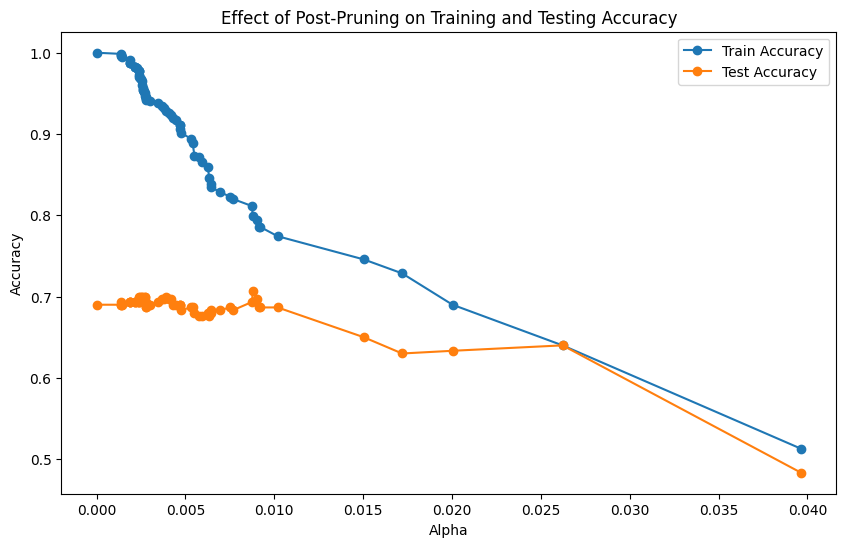

In [49]:
# Step 3: Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Train Accuracy", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Post-Pruning on Training and Testing Accuracy")
plt.legend()
plt.show()

In [50]:
# Select the optimal tree with the best test accuracy
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]
optimal_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.008801154608184737, random_state=42)

In [51]:
# Evaluate the pruned tree
print("Accuracy of pruned tree:", optimal_tree.score(X_test, y_test))

Accuracy of pruned tree: 0.7066666666666667


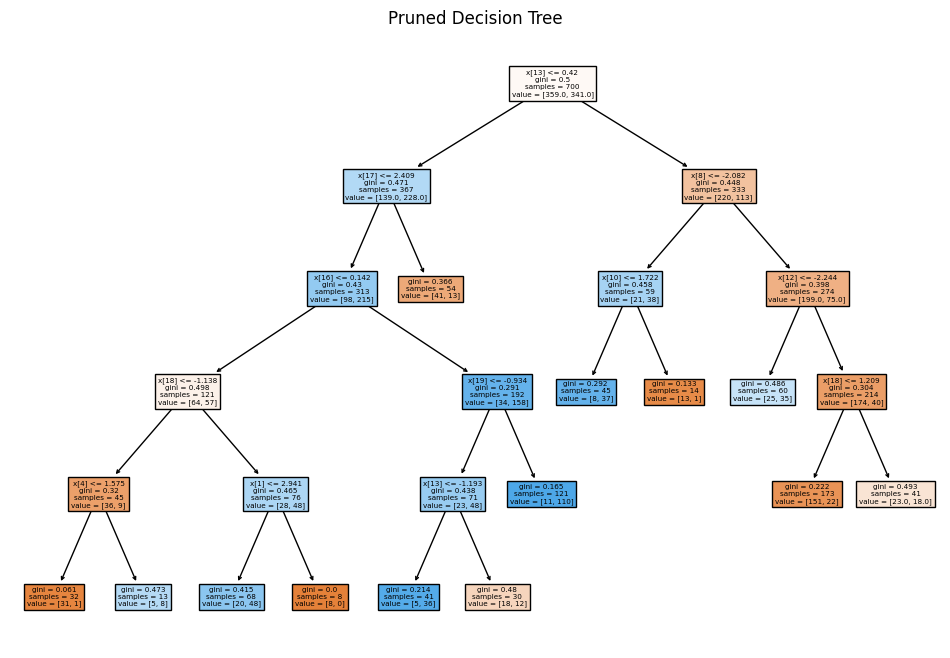

In [53]:
# Visualize the pruned tree

plt.figure(figsize=(12, 8))
plot_tree(optimal_tree, filled=True)
plt.title("Pruned Decision Tree")
plt.show()